## CIA world factbook

In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The data was downloaded from [github repo](https://github.com/factbook/factbook.sql/releases).

In [3]:
q= "SELECT * FROM sqlite_master Where type='table';"
pd.read_sql_query(q,conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [4]:
import pandas as pd
import sqlite3
 
# Making connection, exucuting and fetching the data
conn = sqlite3.connect("factbook.db")
conn.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [5]:
# Reading sql query and displaying first five rows
q1 = "SELECT * FROM facts LIMIT 5;" 
pd.read_sql_query(q1,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


In [6]:
#Display min, max population, min,max population growth
q2 = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts;"
pd.read_sql_query(q2,conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


Above we can see the country with zero population and 7.2 billion population, there seem's to be something unambigious, lets invistigate this further.

In [7]:
q3 = "SELECT * FROM facts WHERE population == (SELECT MIN(population) FROM facts);"
pd.read_sql_query(q3,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [8]:
q4 = "SELECT * FROM facts WHERE population == (SELECT MAX(population) FROM facts);"
pd.read_sql_query(q4,conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


As we can see the country with zero population is Antarctica where life doesn't inhabitate, and country with 7.2 billion population is the entire world,that make sense.

Let's move on to generating histogram for the entire rest of the countries in the table.

D:\anaconda\lib\site-packages\IPython\core\interactiveshell.py:3296: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


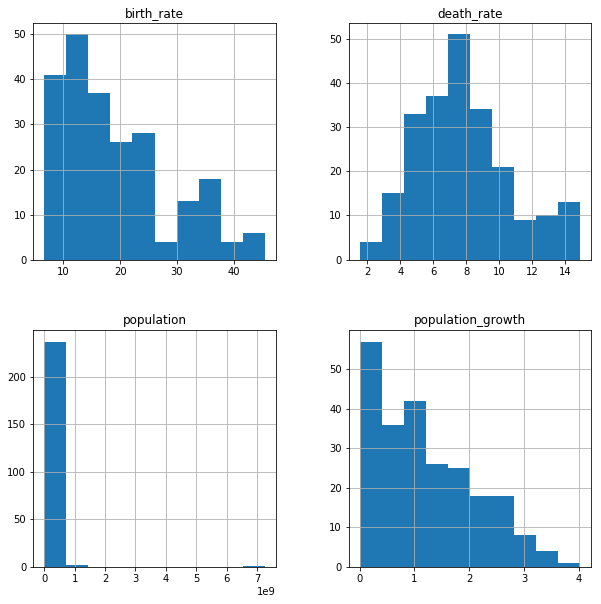

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize =(10,10))
ax = fig.add_subplot(111)

q5 = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population != (SELECT MIN(population) FROM facts) AND population != (SELECT(population) FROM facts);"

pd.read_sql_query(q5,conn).hist(ax=ax);

## Which countries have the highest population density?

In [15]:
q5 = "SELECT name AS Country, (CAST(population AS float)/CAST(area_land AS float))AS Density FROM facts ORDER BY Density DESC;"
pd.read_sql_query(q5,conn)

,Country,Density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000025EEB33DE48>]],
      dtype=object)

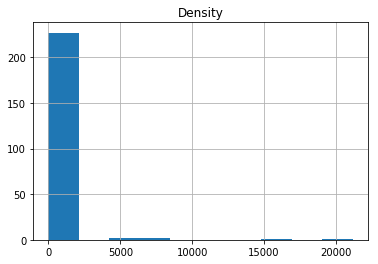

In [16]:
pd.read_sql_query(q5,conn).hist()

## Country having highest ratio of water to land

In [17]:
q6 = "SELECT name AS Country,(CAST(area_water AS float) / CAST(area_land AS float)) AS Water_Land_Ratio FROM facts ORDER BY Water_Land_Ratio DESC LIMIT 20;"
pd.read_sql_query(q6,conn)

,Country,Water_Land_Ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [18]:
q7 = "SELECT name AS Country FROM facts WHERE area_water > area_land;"
pd.read_sql_query(q7,conn)

,Country
0,British Indian Ocean Territory
1,Virgin Islands


British Indian Ocean Territory and Virgin Islands are the country that have more water than land area.